In [3]:
import pandas as pd

import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch

from fontTools.ttLib import TTCollection

In [4]:
df = pd.read_csv('/Users/bhavin/mbappe_real_madrid_data.csv')

In [5]:
df.head()

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,585517,24,MissedShots,0.952,0.576,0.141936,Kylian Mbappe-Lottin,a,3423,OpenPlay,2024,RightFoot,26989,Mallorca,Real Madrid,1,1,2024-08-18 19:30:00,Vinícius Júnior,Pass
1,585525,61,SavedShot,0.881,0.706,0.034307,Kylian Mbappe-Lottin,a,3423,OpenPlay,2024,RightFoot,26989,Mallorca,Real Madrid,1,1,2024-08-18 19:30:00,Jude Bellingham,Pass
2,585528,69,SavedShot,0.939,0.671,0.062559,Kylian Mbappe-Lottin,a,3423,OpenPlay,2024,LeftFoot,26989,Mallorca,Real Madrid,1,1,2024-08-18 19:30:00,NaN,NaN
3,585529,70,MissedShots,0.856,0.579,0.026641,Kylian Mbappe-Lottin,a,3423,FromCorner,2024,RightFoot,26989,Mallorca,Real Madrid,1,1,2024-08-18 19:30:00,NaN,Aerial
4,586749,8,SavedShot,0.893,0.687,0.054954,Kylian Mbappe-Lottin,h,3423,OpenPlay,2024,LeftFoot,26998,Real Madrid,Real Valladolid,3,0,2024-08-25 15:00:00,Antonio Rüdiger,Chipped


In [9]:
df['X'] = df['X'] * 100
df['Y'] = df['Y'] * 100

In [46]:
total_shots = df.shape[0]
total_goals = df[df['result'] == 'Goal'].shape[0]
total_xG = df['xG'].sum()
xG_per_shot = total_xG / total_shots
points_average_distance = df['X'].mean()
actual_average_distance = 120 - (df['X'] * 1.2).mean()

In [47]:
actual_average_distance

13.911724011651415

In [12]:
background_color = '#0C0D0E'

In [20]:
import matplotlib.font_manager as font_manager
font_path = '/System/Library/Fonts/Supplemental/Georgia.ttf'
font_props=font_manager.FontProperties(fname=font_path)

Text(0, 0.0, 'Mistry')

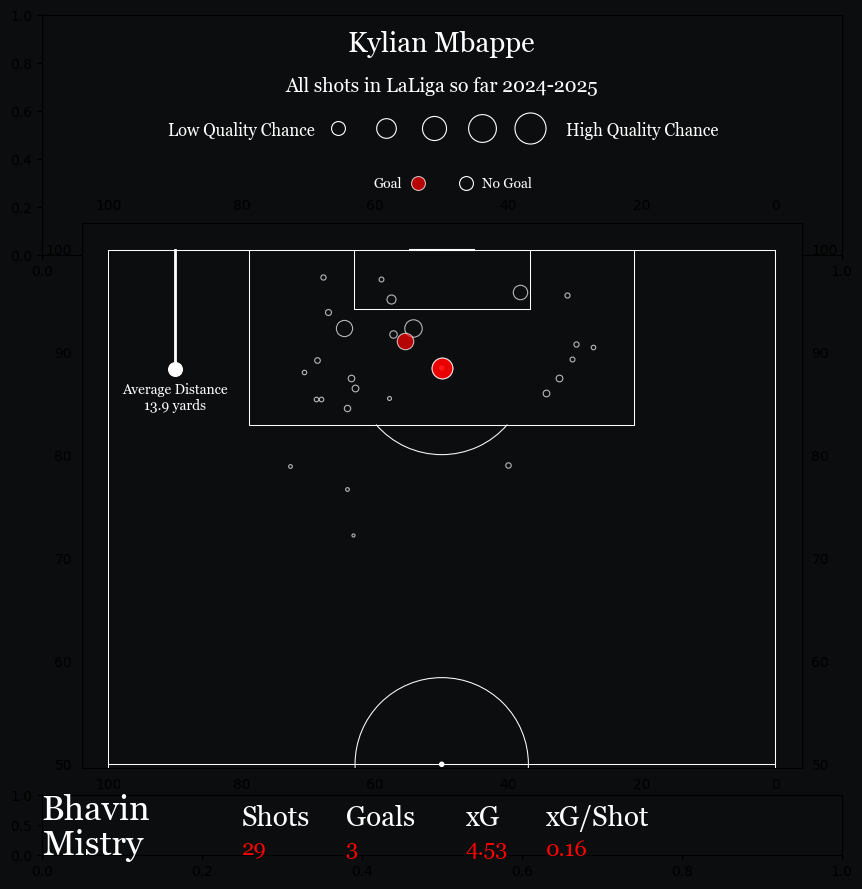

In [83]:
fig = plt.figure(figsize=(8,12))
fig.patch.set_facecolor(background_color)

ax1 = fig.add_axes([0, .7, 1, .2])
ax1.set_facecolor(background_color)
ax1.set_xlim(0,1)
ax1.set_ylim(0,1)


######################################Kylian Mbappe
ax1.text(
    x=.5,
    y=.85,
    s='Kylian Mbappe',
    fontsize=20,
    fontproperties=font_props,
    color='white',
    ha='center'
)


######################################laliga shots text
ax1.text(
    x=.5,
    y=.68,
    s='All shots in LaLiga so far 2024-2025',
    fontsize=14,
    fontproperties=font_props,
    color='white',
    ha='center'
)

######################################low quality
ax1.text(
    x=.25,
    y=.5,
    s='Low Quality Chance',
    fontsize=12,
    fontproperties=font_props,
    color='white',
    ha='center'
)


################################## all circles
#circle 1
ax1.scatter(
    x=.37,
    y=.53,
    s=100,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)


#circle 2
ax1.scatter(
    x=.43,
    y=.53,
    s=200,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)

#circle 3
ax1.scatter(
    x=.49,
    y=.53,
    s=300,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)


#circle 4
ax1.scatter(
    x=.55,
    y=.53,
    s=400,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)


#circle 5
ax1.scatter(
    x=.61,
    y=.53,
    s=500,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)
###################################### end of circles

######################################high quality chances
ax1.text(
    x=.75,
    y=.5,
    s='High Quality Chance',
    fontsize=12,
    fontproperties=font_props,
    color='white',
    ha='center'
)

##################################### goal or no goal
ax1.text(
    x=0.45, 
    y=0.28, 
    s=f'Goal', 
    fontsize=10, 
    fontproperties=font_props, 
    color='white', 
    ha='right'
)


ax1.scatter(
    x=0.47, 
    y=0.3, 
    s=100, 
    color='red', 
    edgecolor='white', 
    linewidth=.8,
    alpha=.7
)


ax1.scatter(
    x=0.53, 
    y=0.3, 
    s=100, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)

ax1.text(
    x=0.55, 
    y=0.28, 
    s=f'No Goal', 
    fontsize=10, 
    fontproperties=font_props, 
    color='white', 
    ha='left'
)
##################################### goal or no goal ends


ax2 = fig.add_axes([.05, .25, .9, .5])
ax2.set_facecolor(background_color)

##################################### plotting the pitch
pitch = VerticalPitch(
    pitch_type='opta',
    half=True,
    pitch_color=background_color,
    pad_bottom=0.5,
    line_color='white',
    linewidth=.75,
    axis=True,
    label=True
)

pitch.draw(ax=ax2)
##################################### plotting the pitch ends

##################################### plotting average shot distance
ax2.scatter(x=90, y=points_average_distance,
            s=100, color='white', linewidth=.8)
ax2.plot([90,90], [100, points_average_distance,], color='white', linewidth=2)
ax2.text(
    x=90, y=points_average_distance -4, 
    s=f'Average Distance\n{actual_average_distance:.1f} yards',
    fontsize=10, fontproperties=font_props,
    color='white', ha='center')


##################################### plotting the shots
for x in df.to_dict(orient='records'):
    pitch.scatter(
        x['X'],
        x['Y'],
        s=300* x['xG'],
        color='red' if x['result'] == 'Goal' else background_color,
        ax=ax2,
        alpha=.7,
        linewidth=.8,
        edgecolor='white'
    )






ax3 = fig.add_axes([0, .2, 1, .05])
ax3.set_facecolor(background_color)

### shots
ax3.text(x=.25, y=.5, s='Shots', fontsize=20, fontproperties=font_props, color='white', ha='left')
ax3.text(x=.25, y=0, s=f'{total_shots}', fontsize=16, fontproperties=font_props, color='red', ha='left')

### goals
ax3.text(x=.38, y=.5, s='Goals', fontsize=20, fontproperties=font_props, color='white', ha='left')
ax3.text(x=.38, y=0, s=f'{total_goals}', fontsize=16, fontproperties=font_props, color='red', ha='left')

### xG
ax3.text(x=.53, y=.5, s='xG', fontsize=20, fontproperties=font_props, color='white', ha='left')
ax3.text(x=.53, y=0, s=f'{total_xG:.2f}', fontsize=16, fontproperties=font_props, color='red', ha='left')

### xG per shot
ax3.text(x=.63, y=.5, s='xG/Shot', fontsize=20, fontproperties=font_props, color='white', ha='left')
ax3.text(x=.63, y=0, s=f'{xG_per_shot:.2f}', fontsize=16, fontproperties=font_props, color='red', ha='left')



#Branding
ax3.text(x=0, y=.6, s='Bhavin', fontsize=25, fontproperties=font_props, color='white', ha='left')
ax3.text(x=0, y=.0, s='Mistry', fontsize=25, fontproperties=font_props, color='white', ha='left')

In [22]:
#pitch
pitch = VerticalPitch(
    pitch_type='opta',
    half=True,
    pitch_color=background_color,
    pad_bottom=.5,
    line_color='white',
    linewidth=.75,
    axis=True,
    label=True
)

In [86]:
# Save the figure
fig.savefig('/Users/bhavin/Documents/mbappe_xg.png', facecolor=background_color, bbox_inches='tight')